In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

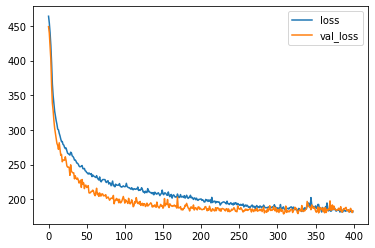

In [29]:
# Plot the loss figure

# TO read from csv and plot, use:
history_df = pd.read_csv('./model_train_validate_loss.csv')

import matplotlib.pyplot as plt
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [60]:
from tensorflow.keras.models import load_model

# Load model
model = load_model('./lstm_covid_regression')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 30, 3)             12        
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 5,775
Trainable params: 5,769
Non-trainable params: 6
_________________________________________________________________


In [61]:
test_set=pd.read_csv("time_series_covid19_confirmed_Texas_counties_transformed.csv").dropna()
test_set = test_set.drop(test_set[test_set['Confirmed Cases'] < 0].index)
test_set = test_set.sort_values(by='Date', ascending=True)
test_set.head()

,FIPS,County,Province_State,Country_Region,Lat,Long,Date,Confirmed Cases
87818,48377.0,Presidio,Texas,US,29.999544,-104.240808,1/1/21,1.0
87791,48311.0,McMullen,Texas,US,28.352517,-98.567692,1/1/21,0.0
87792,48325.0,Medina,Texas,US,29.355730,-99.110303,1/1/21,17.0
87793,48327.0,Menard,Texas,US,30.889907,-99.820479,1/1/21,0.0
87794,48329.0,Midland,Texas,US,31.869041,-102.031568,1/1/21,0.0


In [62]:
from collections import defaultdict
data_dict = defaultdict(list)

for _, line in test_set.iterrows():
    prov_sta, cty_reg, FIPS = line['County'], line['Province_State'], line['FIPS']
    data = [line['Lat'], line['Long'], line['Confirmed Cases']]
    data_dict[prov_sta, cty_reg, FIPS].append(data)
for k in data_dict.keys():
    data_dict[k] = np.array(data_dict[k])
print(data_dict)

defaultdict(<class 'list'>, {('Presidio', 'Texas', 48377.0): array([[  29.99954402, -104.2408079 ,    1.        ],
       [  29.99954402, -104.2408079 ,    2.        ],
       [  29.99954402, -104.2408079 ,    3.        ],
       ...,
       [  29.99954402, -104.2408079 ,    7.        ],
       [  29.99954402, -104.2408079 ,    0.        ],
       [  29.99954402, -104.2408079 ,    2.        ]]), ('McMullen', 'Texas', 48311.0): array([[ 28.35251708, -98.56769164,   0.        ],
       [ 28.35251708, -98.56769164,   0.        ],
       [ 28.35251708, -98.56769164,   0.        ],
       ...,
       [ 28.35251708, -98.56769164,   0.        ],
       [ 28.35251708, -98.56769164,   1.        ],
       [ 28.35251708, -98.56769164,   0.        ]]), ('Medina', 'Texas', 48325.0): array([[ 29.3557301 , -99.11030298,  17.        ],
       [ 29.3557301 , -99.11030298,   0.        ],
       [ 29.3557301 , -99.11030298,   0.        ],
       ...,
       [ 29.3557301 , -99.11030298, 115.        ],
   

In [63]:
for key, values in data_dict.items():
    x_test=values[-30:, :]
    predict=model.predict(x_test.reshape(1, 30, 3))
    new_day=np.array([[data_dict[key][0][0], data_dict[key][0][1], predict[0][-1]]])
    data_dict[key] = np.append(data_dict[key], new_day, axis=0)

In [76]:
test_set=pd.read_csv("time_series_covid19_confirmed_Texas_counties_transformed.csv")
for key, value in data_dict.items():
    test_set=test_set.append({"FIPS": key[2], "County": key[0], "Province_State": key[1], "Country_Region": "US", 
                      "Lat": value[-1, 0], 'Long':value[-1, 1], 'Date':"11/30/21", "Confirmed Cases":int(value[-1, 2])}, ignore_index=True)
    
    

In [77]:
test_set.to_csv('./texas_predict.csv')

In [5]:
# To predict one data sample:

# X_input should be a 30-days time slice
# The final input shape is : (1, 30, 3)
# 1 for one input (also can input multiple)
# 30 for the length of 30-days time slice
# 3 for the 3-dimentional tuple for each day: [latitude, longitude, confirmed_cases]

preds = model.predict(X_test[0].reshape(1, 30, 3))
pred_case_num = preds[0, -1]  # 0 to open the wrapper, -1 to get the number of predicted cases
print(pred_case_num)

NameError: name 'X_test' is not defined